## PS04 &mdash; Exercises from Pasha pp. 8-5 to 8-26

### Exercise 8.1 &mdash; Galaxy Flux

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as ac
from astropy.cosmology import WMAP9 as cosmo

D_L = cosmo.comoving_distance(z=2.5)

L = 10**10 * u.Lsun
F = L / (4 * np.pi * D_L**2)
F

<Quantity 22.40828861 solLum / Mpc2>

### Exercise 8.2 &mdash; Getting Bigger Again

In [2]:
# As Pasha suggests, let's plot d_A for a variety of redshifts

# If d_A (for some redshift) is 1pc then if it is appears to be an
# arcsecond across, it is 1pc wide.

some_zs = np.linspace(0.0, 4.0, 401)

In [3]:
some_d_As = [cosmo.angular_diameter_distance(z=z) for z in some_zs]
values = [d_A.value for d_A in some_d_As]

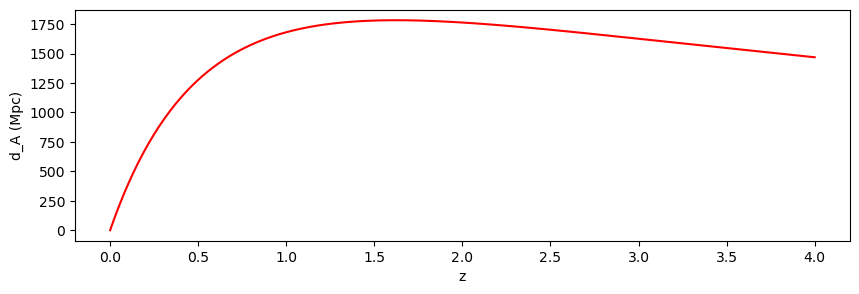

In [4]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(some_zs, values, label='d_A', color='r')
ax.set_xlabel('z')
ax.set_ylabel('d_A (Mpc)');

In [5]:
## I had some trouble imagining what units are being used
## here, but apparently the units are radians. In other words, if an
## object is 1 radian in angular size, d_A is the scaling factor that tells
## us how many Megaparsecs across it actually is.

## With the preceding comment in mind, we convert 0.1 arcseconds to radians
## and call that theta, and then ask, for what z is theta * d_A(z) = 0.763kpc.

theta = 0.1 * u.arcsec.to(u.rad)

desired_d_A = 0.763 * 0.001 * u.Mpc / theta
desired_d_A

<Quantity 1573.80047167 Mpc>

In [6]:
np.where(values > desired_d_A.value)

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257

In [7]:
# So inspecting the result of np.where(), the z value
# is between the 79th and 80th z index, which would be

print(f'result is between {some_zs[79]:.2f} and {some_zs[80]:.2f}')

result is between 0.79 and 0.80


### Exercise 8.3 &mdash; Practice with Plotting

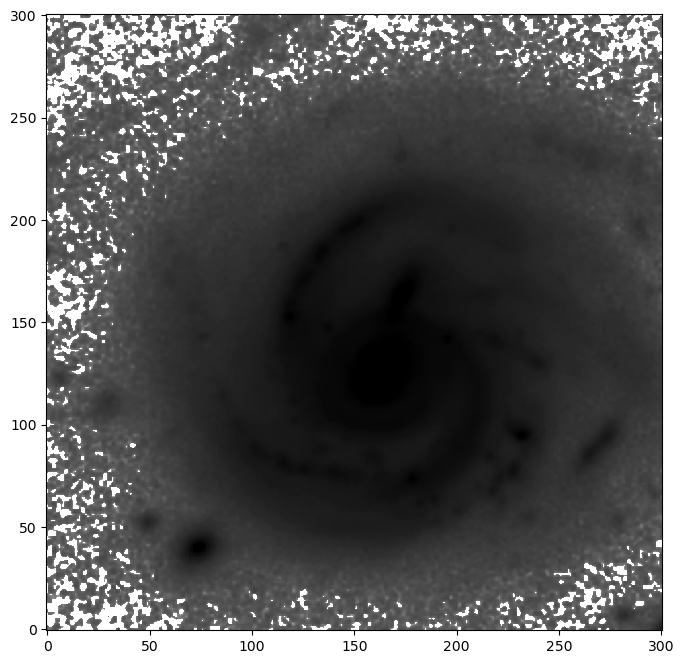

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=vmin, vmax=vmax)

# open the file
with fits.open('../BookDatasets/HST_JWST/jwst_f277W_crop.fits') as hdu:
    image = hdu[0].data
    header = hdu[0].header

cropped_image = image[850:1151, 950:1251] # a little below and right of center

s = 5
vmin = np.median(image) - 0.5 * np.std(image)
vmax = np.mean(image) - np.median(image) + s * np.std(image)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cropped_image, norm=norm, cmap='gray_r', origin='lower');


### Exercise 8.4 &mdash; Spectral Energy Distributions

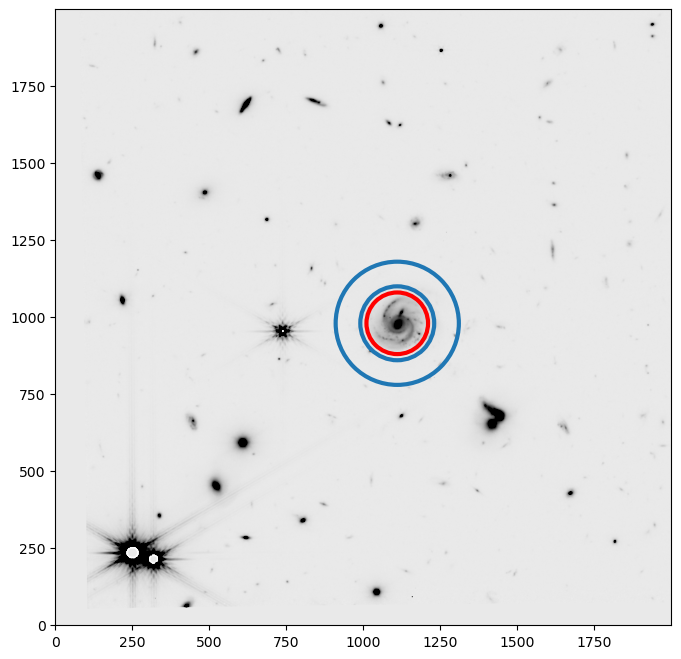

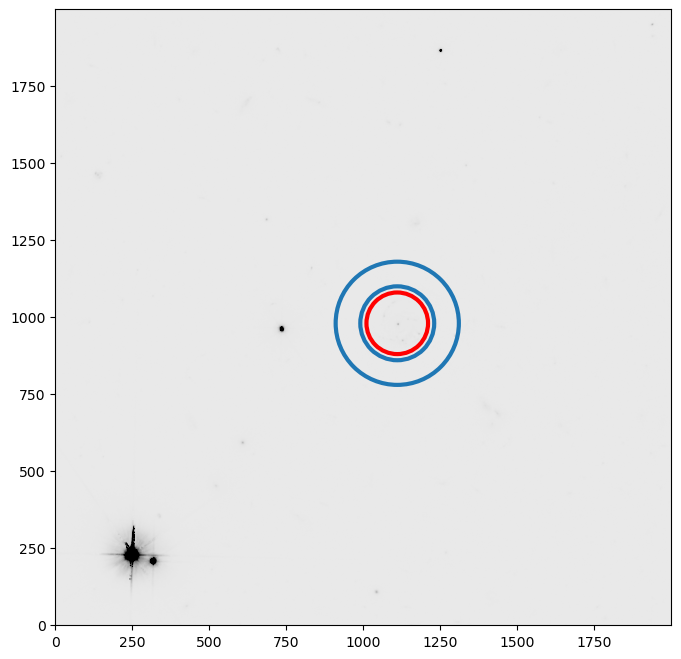

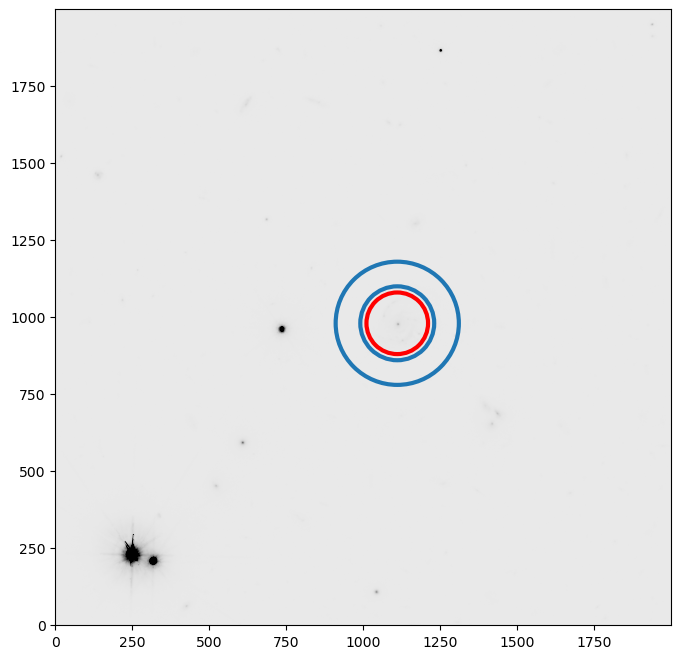

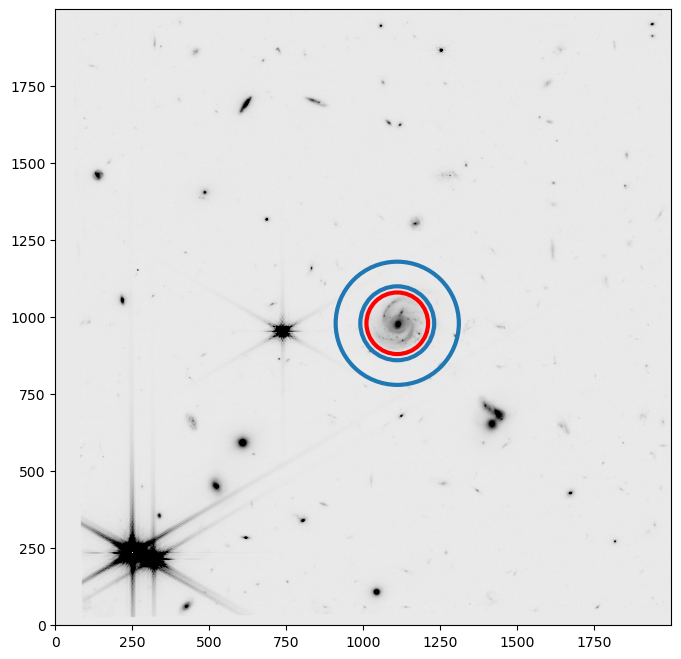

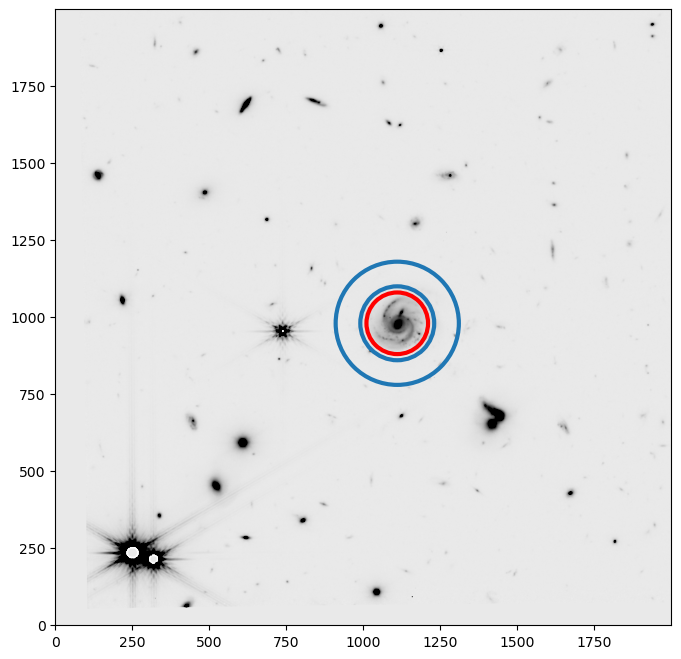

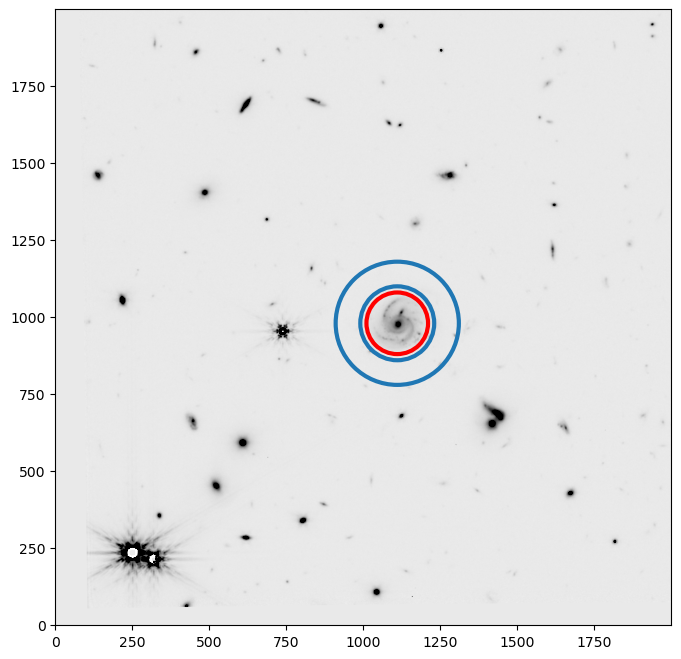

In [22]:
### Aperture Photometry

### Circular Aperture and Annulus

from photutils.aperture import CircularAperture, CircularAnnulus

# define pixel aperture and annulus
aperture = CircularAperture([1110, 980], r=100)
aperture = CircularAperture([1110, 980], r=100)
bg_annulus = CircularAnnulus([1110, 980], r_in=120, r_out=200)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin='lower')
aperture.plot(color='r', lw=3)
bg_annulus.plot(color='C0', lw=3);


# open the file

image_paths = [
    '../BookDatasets/HST_JWST/hst_f606W_crop.fits',
    '../BookDatasets/HST_JWST/hst_f814W_crop.fits',
    '../BookDatasets/HST_JWST/jwst_f150W_crop.fits',
    '../BookDatasets/HST_JWST/jwst_f277W_crop.fits',
    '../BookDatasets/HST_JWST/jwst_f444W_crop.fits'
]

def load_fits_image(image_path):
    with fits.open(image_path) as hdu:
        image = hdu[0].data
    return image

images = [load_fits_image(image_path) for image_path in image_paths]

def plot_aperture(image):
    # Define pixel aperture and annulus
    aperture = CircularAperture([1110, 980], r=100)
    bg_annulus = CircularAnnulus([1110, 980], r_in=120, r_out=200)

    # Create plot
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin='lower')
    aperture.plot(color='r', lw=3)
    bg_annulus.plot(color='C0', lw=3)
    
for image in images:
    plot_aperture(image)
